In [240]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [241]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [242]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [243]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [244]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [245]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label, regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass, binary_dilation, zoom
import plotly.graph_objects as go

In [246]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


In [247]:
import pydicom as dicom
import os
from matplotlib import pyplot, cm

In [275]:
PathDicom = 'E:/Research/Image_processing/youtube_course/CT_image_processing/course1/NA-79262'
lstFileDCM = [] # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
   for filename in fileList:
       if".dcm" in filename.lower(): # check whether the file's DICOM
           lstFileDCM.append(os.path.join(dirName,filename))

In [276]:
# Get ref file
RefDs = dicom.read_file(lstFileDCM[0])

# Load dimensions based on the number of rows, columns, and slice (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFileDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [277]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype = RefDs.pixel_array.dtype)

# Loop through all the DICOM files
for filenameDCM in lstFileDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    #store the raw image data
    ArrayDicom[:,:, lstFileDCM.index(filenameDCM)] = ds.pixel_array

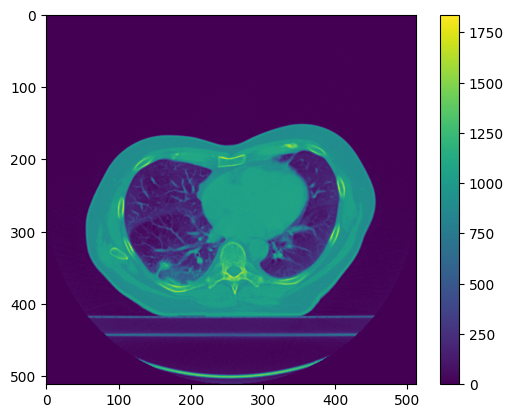

In [278]:
ArrayDicom.shape
plt.imshow(ArrayDicom[:,:,50])
plt.colorbar()

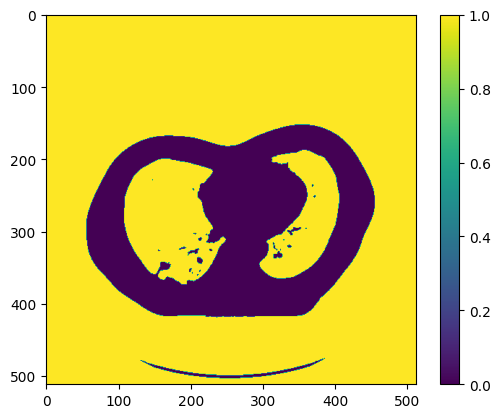

In [279]:
mask = ArrayDicom < 800
plt.imshow(mask[:,:, 50])
plt.colorbar()

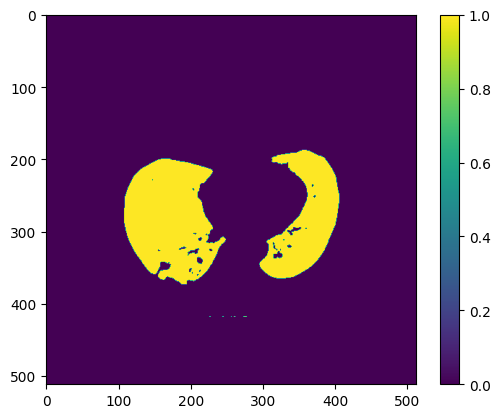

In [280]:
mask = np.vectorize(clear_border, signature = '(n,m)->(n,m)')(mask)
plt.imshow(mask[:,:,50])
plt.colorbar()

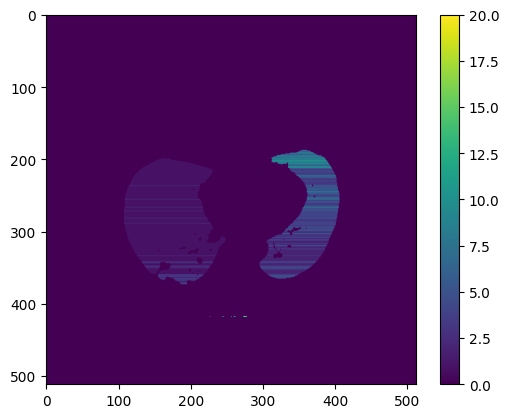

In [281]:
mask_labeled = np.vectorize(label, signature = '(n,m)->(n,m)')(mask)
plt.imshow(mask_labeled[:,:,50])
plt.colorbar()

In [282]:
slc = mask_labeled[:,:,50]

In [283]:
rps = regionprops(slc)

In [284]:
areas = [r.area for r in rps]

In [258]:
areas

[14733.0,
 3566.0,
 2466.0,
 2672.0,
 1232.0,
 714.0,
 498.0,
 453.0,
 134.0,
 213.0,
 130.0,
 1.0,
 2.0,
 5.0]

In [285]:
np.argsort(areas)[::-1]

array([ 0,  1,  3,  2,  4,  5,  6,  7,  9,  8, 10, 13, 12, 11],
      dtype=int64)

In [287]:
new_slc = np.zeros_like(slc)

In [288]:
tuple(rps[0].coords.T)

(array([200, 200, 200, ..., 359, 359, 359], dtype=int64),
 array([159, 160, 161, ..., 216, 217, 218], dtype=int64))

In [289]:
new_slc = np.zeros_like(slc)
idxs = np.argsort(areas)[::-1]
for i in idxs[:3]:
    new_slc[tuple(rps[i].coords.T)]= i +1

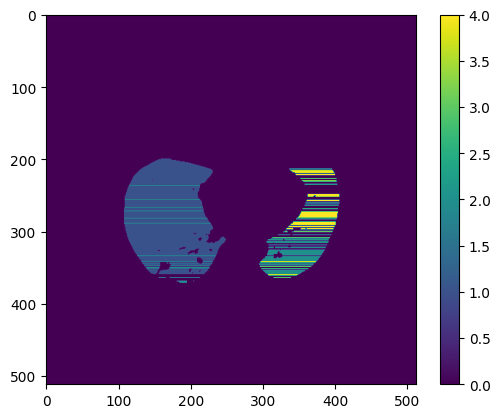

In [290]:
plt.imshow(new_slc)
plt.colorbar()

In [292]:
def keep_top(slc):
    new_slc = np.zeros_like(slc)
    rps = regionprops(slc)
    areas = [r.area for r in rps]
    idxs = np.argsort(areas)[::-1]
    for i in idxs[:3]:
        new_slc[tuple(rps[i].coords.T)] = i+1
    return new_slc


In [294]:
mask_labeled = np.vectorize(keep_top, signature = '(n,m)->(n,m)')(mask_labeled)

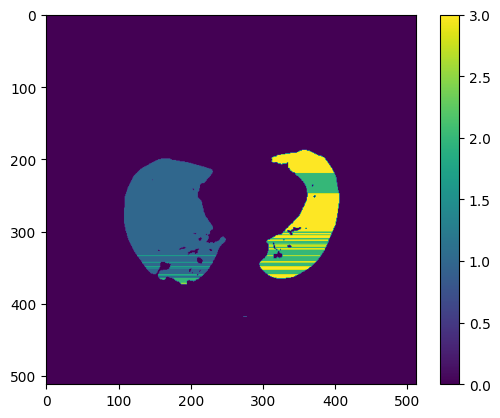

In [295]:
plt.imshow(mask_labeled[:,:,50])
plt.colorbar()

In [296]:
mask = mask_labeled > 0
mask = np.vectorize(ndi.binary_fill_holes, signature = '(n,m)->(n,m)')(mask)

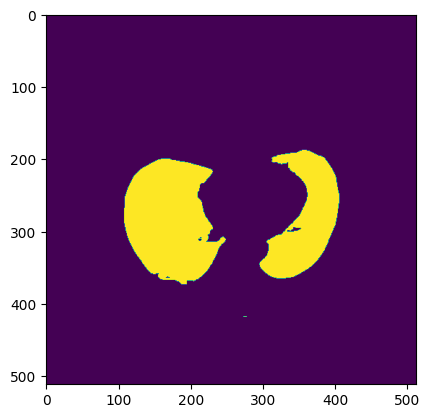

In [297]:
plt.imshow(mask[:,:,50])

In [299]:
def remove_trachea(slc, c = 0.0069):
    new_slc = slc.copy()
    labels = label(slc, connectivity = 1, background = 0)
    rps = regionprops (labels)
    areas = np.array([r.area for r in rps])
    idxs = np.where(areas/512**2 < c)[0]
    for i in idxs:
        new_slc[tuple(rps[i].coords.T)] = 0
    return new_slc

In [300]:
mask = np.vectorize(remove_trachea, signature = '(n,m)->(n,m)')(mask)

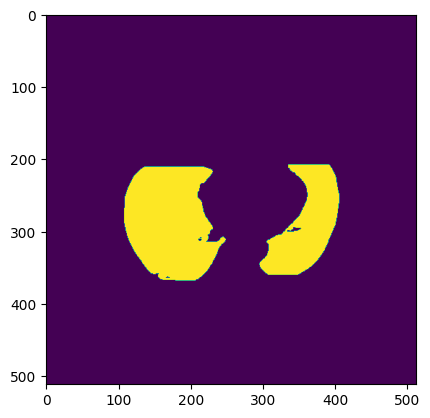

In [301]:
plt.imshow(mask[:,:,50])

In [302]:
mask[:,:, -50]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

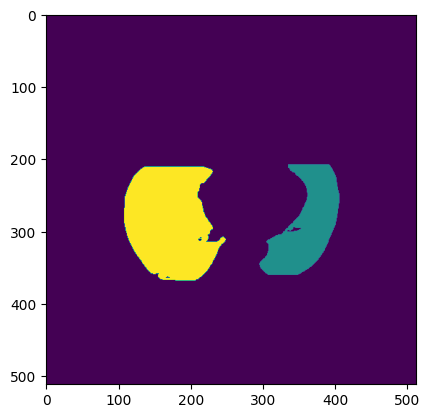

In [303]:
labels = label(mask[:,:,50],connectivity = 1, background = 0)
plt.imshow(labels)